In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("china_gdp.csv")
df

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


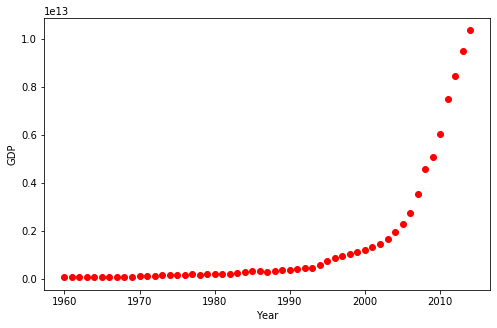

In [7]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

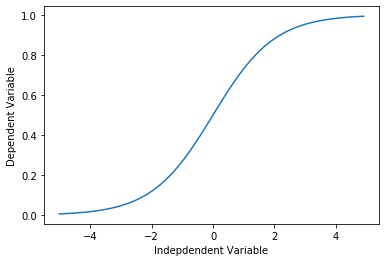

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [9]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

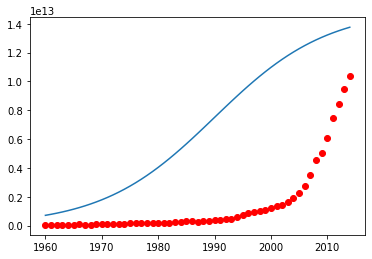

In [10]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [11]:
# normalize data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [12]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(pcov)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

[[ 1.52273888e+03 -2.88115948e-04]
 [-2.88115948e-04  7.25956454e-09]]
 beta_1 = 690.453018, beta_2 = 0.997207


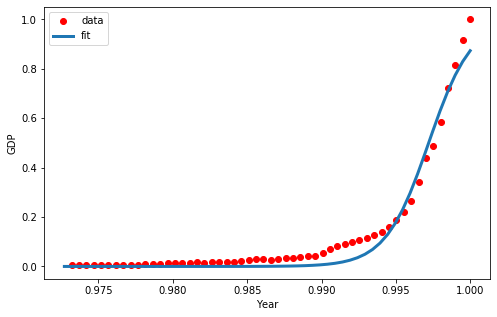

In [13]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8
x_train = xdata[msk]
y_train = ydata[msk]
x_test  = xdata[~msk]
y_test = ydata[~msk]
popt, pcov = curve_fit(sigmoid, x_train, y_train)
y = sigmoid(x_test, *popt)
print("Mean absolute error: %.2f" %np.mean(np.absolute(y-y_test)))
print("Residual sum of squares(MSE): %.2d" % np.mean(y-y_test)**2)
from sklearn.metrics import r2_score
print("R2-score: %.2f" %r2_score(y, y_test))

Mean absolute error: 0.04
Residual sum of squares(MSE): 00
R2-score: 0.96
